# Alzheimer Disease Prediction - Exploratory Data Analysis

This notebook explores the Alzheimer disease dataset to understand which factors are associated with Alzheimer diagnoses. The goal is to build a predictive model that can identify patients at risk of Alzheimer's disease based on various clinical, demographic, and lifestyle factors.

### Dataset Overview:

The dataset contains patient information including:
- **Demographics**: Age, Gender, Ethnicity, Education Level
- **Lifestyle factors**: BMI, Smoking, Alcohol Consumption, Physical Activity, Diet Quality, Sleep Quality
- **Medical history**: Family History, Cardiovascular Disease, Diabetes, Depression, Head Injury, Hypertension
- **Clinical measurements**: Blood Pressure (Systolic/Diastolic), Cholesterol levels (Total, LDL, HDL, Triglycerides)
- **Cognitive & functional assessments**: MMSE (Mini-Mental State Examination), Functional Assessment, ADL (Activities of Daily Living), Memory Complaints, Behavioral Problems
- **Symptoms**: Confusion, Disorientation, Personality Changes, Difficulty Completing Tasks, Forgetfulness
- **Target variable**: Diagnosis (0 = No Alzheimer, 1 = Alzheimer)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.max_columns', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 1. Data Understanding and Preparation

### 1.1 Read the Data

Let's open the csv and assign to a dataframe variable.


In [2]:
# Define the parameters to read the data
root_path = ""
dataset = "alzheimers_disease_data.csv"
sep = ","
encoding = "utf-8"

# Read the data
original_data = pd.read_csv(
    filepath_or_buffer=os.path.abspath(os.path.join(root_path, dataset)), 
    sep=sep, 
    encoding=encoding
)

data = original_data.copy()
data.head()


PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0         142           72        242.366840   
1           0             0         115           64        231.162595   
2           0             0          99          116        284.181858   
3           0             0         118          115        159.582240   
4           0             0          94          117        237.602184   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0       56.150897       33.682563                162.189143  21.463532   
1      193.407996       79.028477                294.630909  20.613267   
2      153.322762       69.772292                 83.638324   7.356249   
3       65.366637       68.457491                277.577358  13.991127   
4       92.869700       56.874305                291.198780  13.517609   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696                 0                   0  2.592424   
2              5.895077                 0                   0  7.119548   
3              8.965106                 0                   1  6.481226   
4              6.045039                 0                   0  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis DoctorInCharge  
0              0          0      XXXConfid  
1              1          0      XXXConfid  
2              0          0      XXXConfid  
3              0          0      XXXConfid  
4              0          0      XXXConfid

### 1.2 Dataset Exploratory Data Analysis (EDA)

#### Dataset Information

Let's identify the type of the variables (integer, float, object...) and the size of the dataset. Which are the variables with more nulls? And with no nulls?

**Questions:**
- How many records does the data have?
- How many nulls does each attribute have?
- Has each attribute the right datatype?


In [3]:
# Analyze dataset info, size, and data types
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()
print("\nNull values per column:")
print(data.isnull().sum())
print("\nData types:")
print(data.dtypes)


Dataset Shape: (2149, 35)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabete

#### Descriptive Statistics

Explore the dataset using descriptive statistics to understand the distribution of numerical and categorical variables.


In [4]:
# Descriptive statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print(data.describe())

# Check unique values in categorical variables
print("\nUnique values in categorical variables:")
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 
                    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 
                    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

for col in categorical_cols:
    if col in data.columns:
        print(f"{col}: {data[col].unique()}")

# Value counts for key categorical variables
print("\nValue counts for key categorical variables:")
print("\nDiagnosis distribution:")
print(data['Diagnosis'].value_counts())
print("\nGender distribution:")
print(data['Gender'].value_counts())
print("\nEthnicity distribution:")
print(data['Ethnicity'].value_counts())
print("\nEducationLevel distribution:")
print(data['EducationLevel'].value_counts())


Descriptive Statistics for Numerical Variables:
         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173        

#### Target Variable Distribution


Target Variable Distribution:
Diagnosis
No Alzheimer    1389
Alzheimer        760
Name: count, dtype: int64

Percentages:
Diagnosis
No Alzheimer    64.63
Alzheimer       35.37
Name: count, dtype: float64


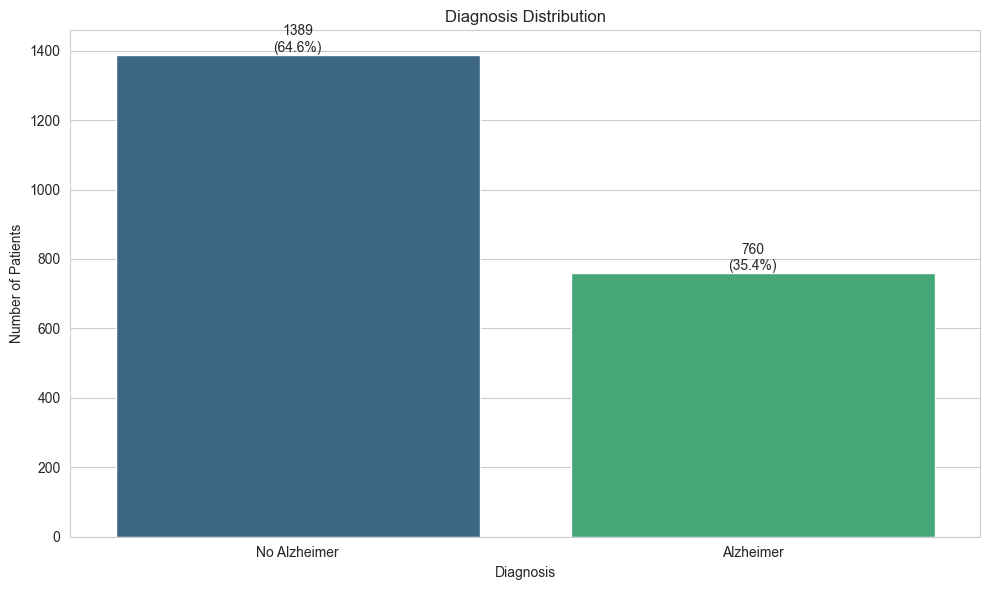

In [5]:
# Define target variable
target_variable = ["Diagnosis"]

# Target distribution
class_counts = data['Diagnosis'].value_counts().rename({0: "No Alzheimer", 1: "Alzheimer"})
class_props = (class_counts / len(data) * 100).round(2)

print("Target Variable Distribution:")
print(class_counts)
print("\nPercentages:")
print(class_props)

# Visualize target distribution
ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
ax.set_title("Diagnosis Distribution")
ax.set_ylabel("Number of Patients")
for p, c in zip(ax.patches, class_counts.values):
    ax.annotate(f"{c}\n({c/len(data)*100:.1f}%)", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")
plt.tight_layout()
plt.show()


Before modeling, note the dataset’s moderate class imbalance (~65% no Alzheimer vs 35% Alzheimer), so stratified splits, imbalance-aware metrics, and class-weighted or resampled training are key.

#### Relationship between Diagnosis and Numerical Variables

Draw box plots and distribution plots for numerical variables grouped by diagnosis.


In [6]:
# Define numerical variables (exclude PatientID, DoctorInCharge, and target)
num_variables = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                 'MMSE', 'FunctionalAssessment', 'ADL', 'AlcoholConsumption',
                 'PhysicalActivity', 'DietQuality', 'SleepQuality']

# Filter to only include columns that exist in the dataset
num_variables = [col for col in num_variables if col in data.columns]

print(f"Numerical variables to analyze: {len(num_variables)}")
print(num_variables)


Numerical variables to analyze: 15
['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']


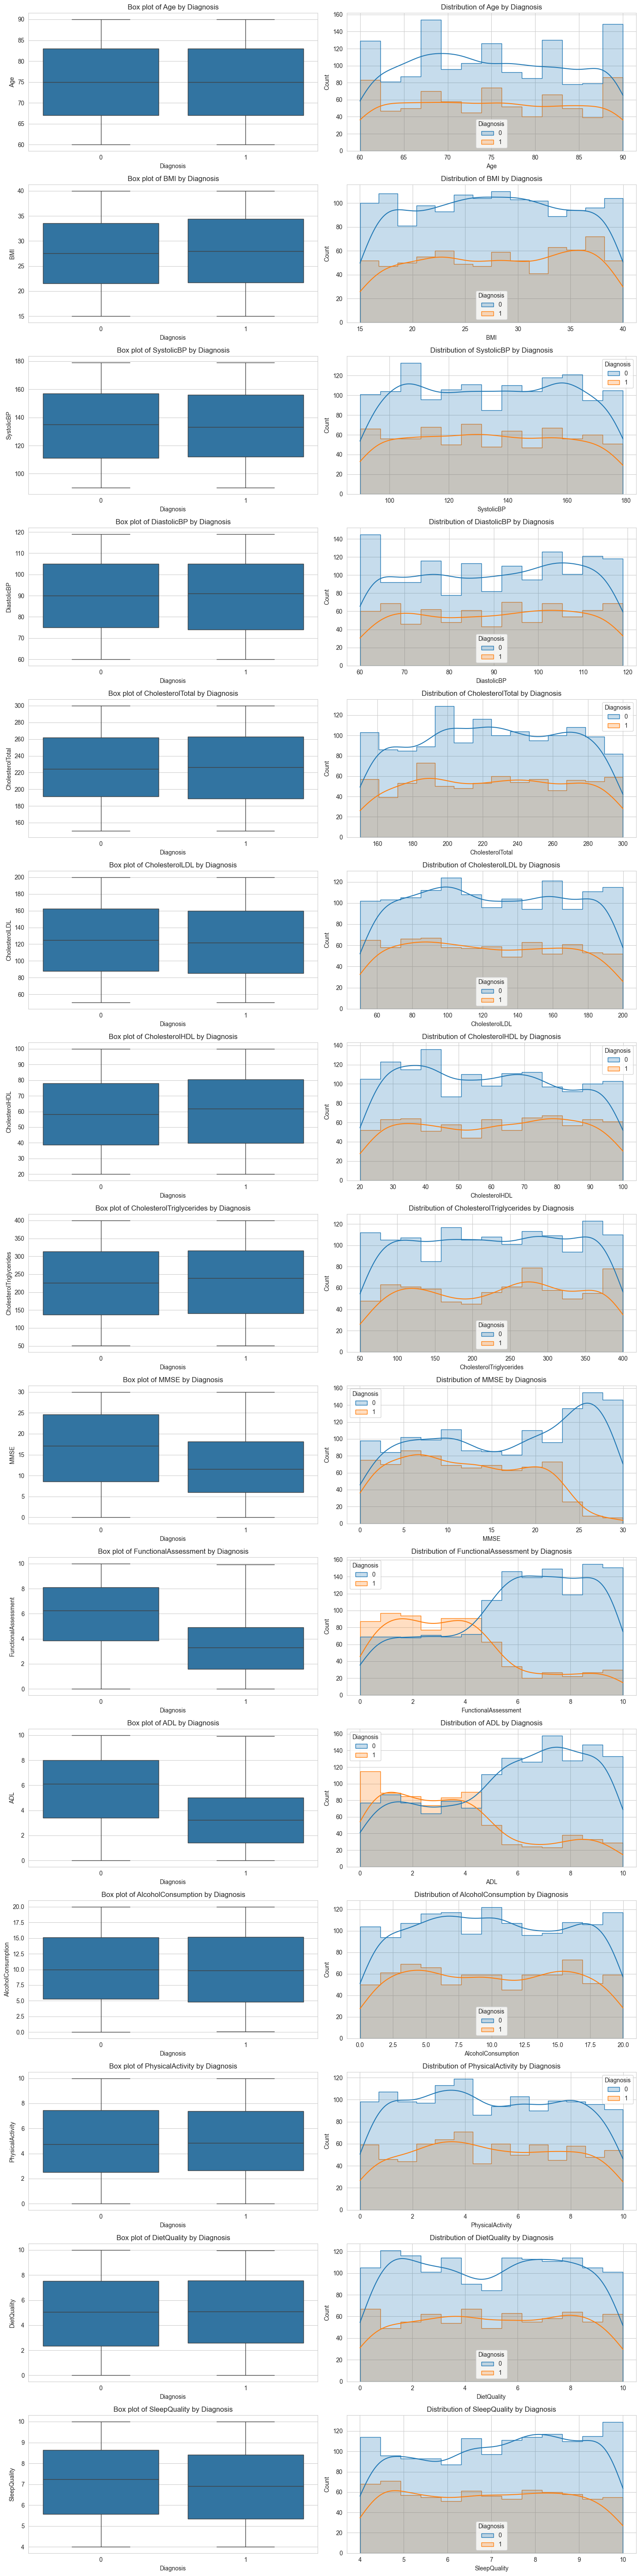

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Determine the number of rows and columns for the subplot grid
num_vars = len(num_variables)
cols = 2  # Two plots for each variable: boxplot and distribution plot
rows = num_vars  # One row for each variable

# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(15, 4*rows))

# Box plots and distribution plots for numerical variables
for i, column in enumerate(num_variables):
    # Box plot: variable grouped by diagnosis
    sns.boxplot(x='Diagnosis', y=column, data=data, ax=axs[i, 0])
    axs[i, 0].set_title(f'Box plot of {column} by Diagnosis')

    # Distribution plot: variable against diagnosis value (grouped by diagnosis)
    sns.histplot(data=data, x=column, hue='Diagnosis', kde=True, element='step', ax=axs[i, 1])
    axs[i, 1].set_title(f'Distribution of {column} by Diagnosis')

# Adjust layout
plt.tight_layout()
plt.show()


For each feature (age, BMI, blood pressures, cholesterol measures, MMSE, lifestyle scores, etc.), the blue and orange distributions almost completely overlap: medians and IQRs in the boxplots are nearly identical, and the histogram/KDE overlays track each other closely. A few slight tendencies appear, e.g., diagnosed patients show marginally lower MMSE, functional assessment, ADL, and sleep quality, but the effect sizes are small, and the spreads overlap heavily. Overall, these univariate views suggest that no single numeric feature provides strong discriminatory power on its own.

#### Relationship between Diagnosis and Categorical Variables

Draw count plots for categorical variables grouped by diagnosis.


In [8]:
# Define categorical variables (binary and multi-category)
# Binary variables
binary_variables = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 
                    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
                    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
                    'DifficultyCompletingTasks', 'Forgetfulness']

# Multi-category variables
multi_cat_variables = ['Ethnicity', 'EducationLevel']

categorical_variables = binary_variables + multi_cat_variables

# Filter to only include columns that exist in the dataset
categorical_variables = [col for col in categorical_variables if col in data.columns]

print(f"Categorical variables to analyze: {len(categorical_variables)}")
print(categorical_variables)


Categorical variables to analyze: 17
['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Ethnicity', 'EducationLevel']


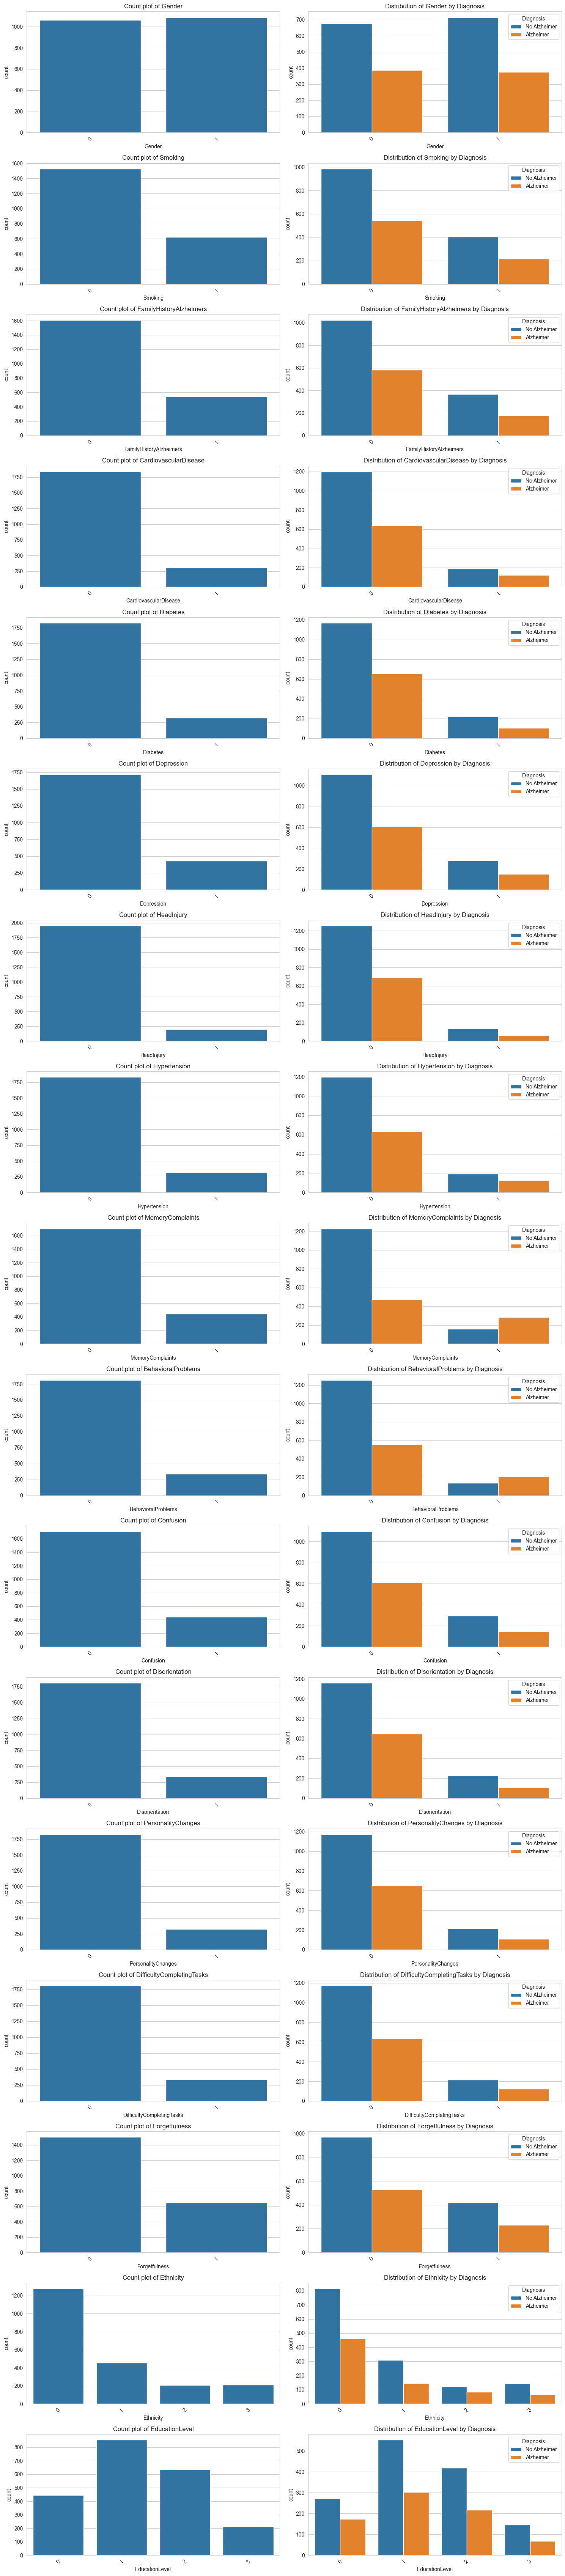

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Determine the number of rows and columns for the subplot grid
cat_vars = len(categorical_variables)
cols = 2  # Two plots for each variable: count plot and distribution plot
rows = cat_vars  # One row for each variable

# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(15, 4*rows))

# Count plots and distribution plots for categorical variables
for i, column in enumerate(categorical_variables):
    # Count plot: variable alone (without diagnosis grouping)
    sns.countplot(x=column, data=data, ax=axs[i, 0])
    axs[i, 0].set_title(f'Count plot of {column}')
    axs[i, 0].tick_params(axis='x', rotation=45)
    
    # Distribution plot: variable against diagnosis value (grouped by diagnosis)
    sns.countplot(x=column, hue='Diagnosis', data=data, ax=axs[i, 1])
    axs[i, 1].set_title(f'Distribution of {column} by Diagnosis')
    axs[i, 1].tick_params(axis='x', rotation=45)
    axs[i, 1].legend(title='Diagnosis', labels=['No Alzheimer', 'Alzheimer'])

# Adjust layout
plt.tight_layout()
plt.show()


From the bar charts, several categorical variables show clear imbalances and potentially meaningful relationships with the Alzheimer’s diagnosis. 

Variables such as CardiovascularDisease, Depression, Hypertension, MemoryComplaints, and BehavioralProblems have a higher proportion of Alzheimer diagnoses relative to their group size, suggesting they may act as risk factors or correlates. Other variables like Gender and Ethnicity show weaker associations, with distributions that remain relatively similar across classes, indicating limited predictive power on their own. However, Ethnicity 2 (Asian) has almost as many Alzheimer cases as non-Alzheimer cases, which is very different from the other ethnic groups. This suggests that Ethnicity = 2 may be associated with an increased likelihood of Alzheimer’s in this dataset, even though the absolute counts are small. 

Overall, while many categorical variables are imbalanced in the dataset (with far more negatives than positives), the relative proportions within each category reveal that several health-related conditions may contribute useful signal for predictive modeling, whereas demographic variables appear less informative.

#### Pairplot for Key Numerical Variables


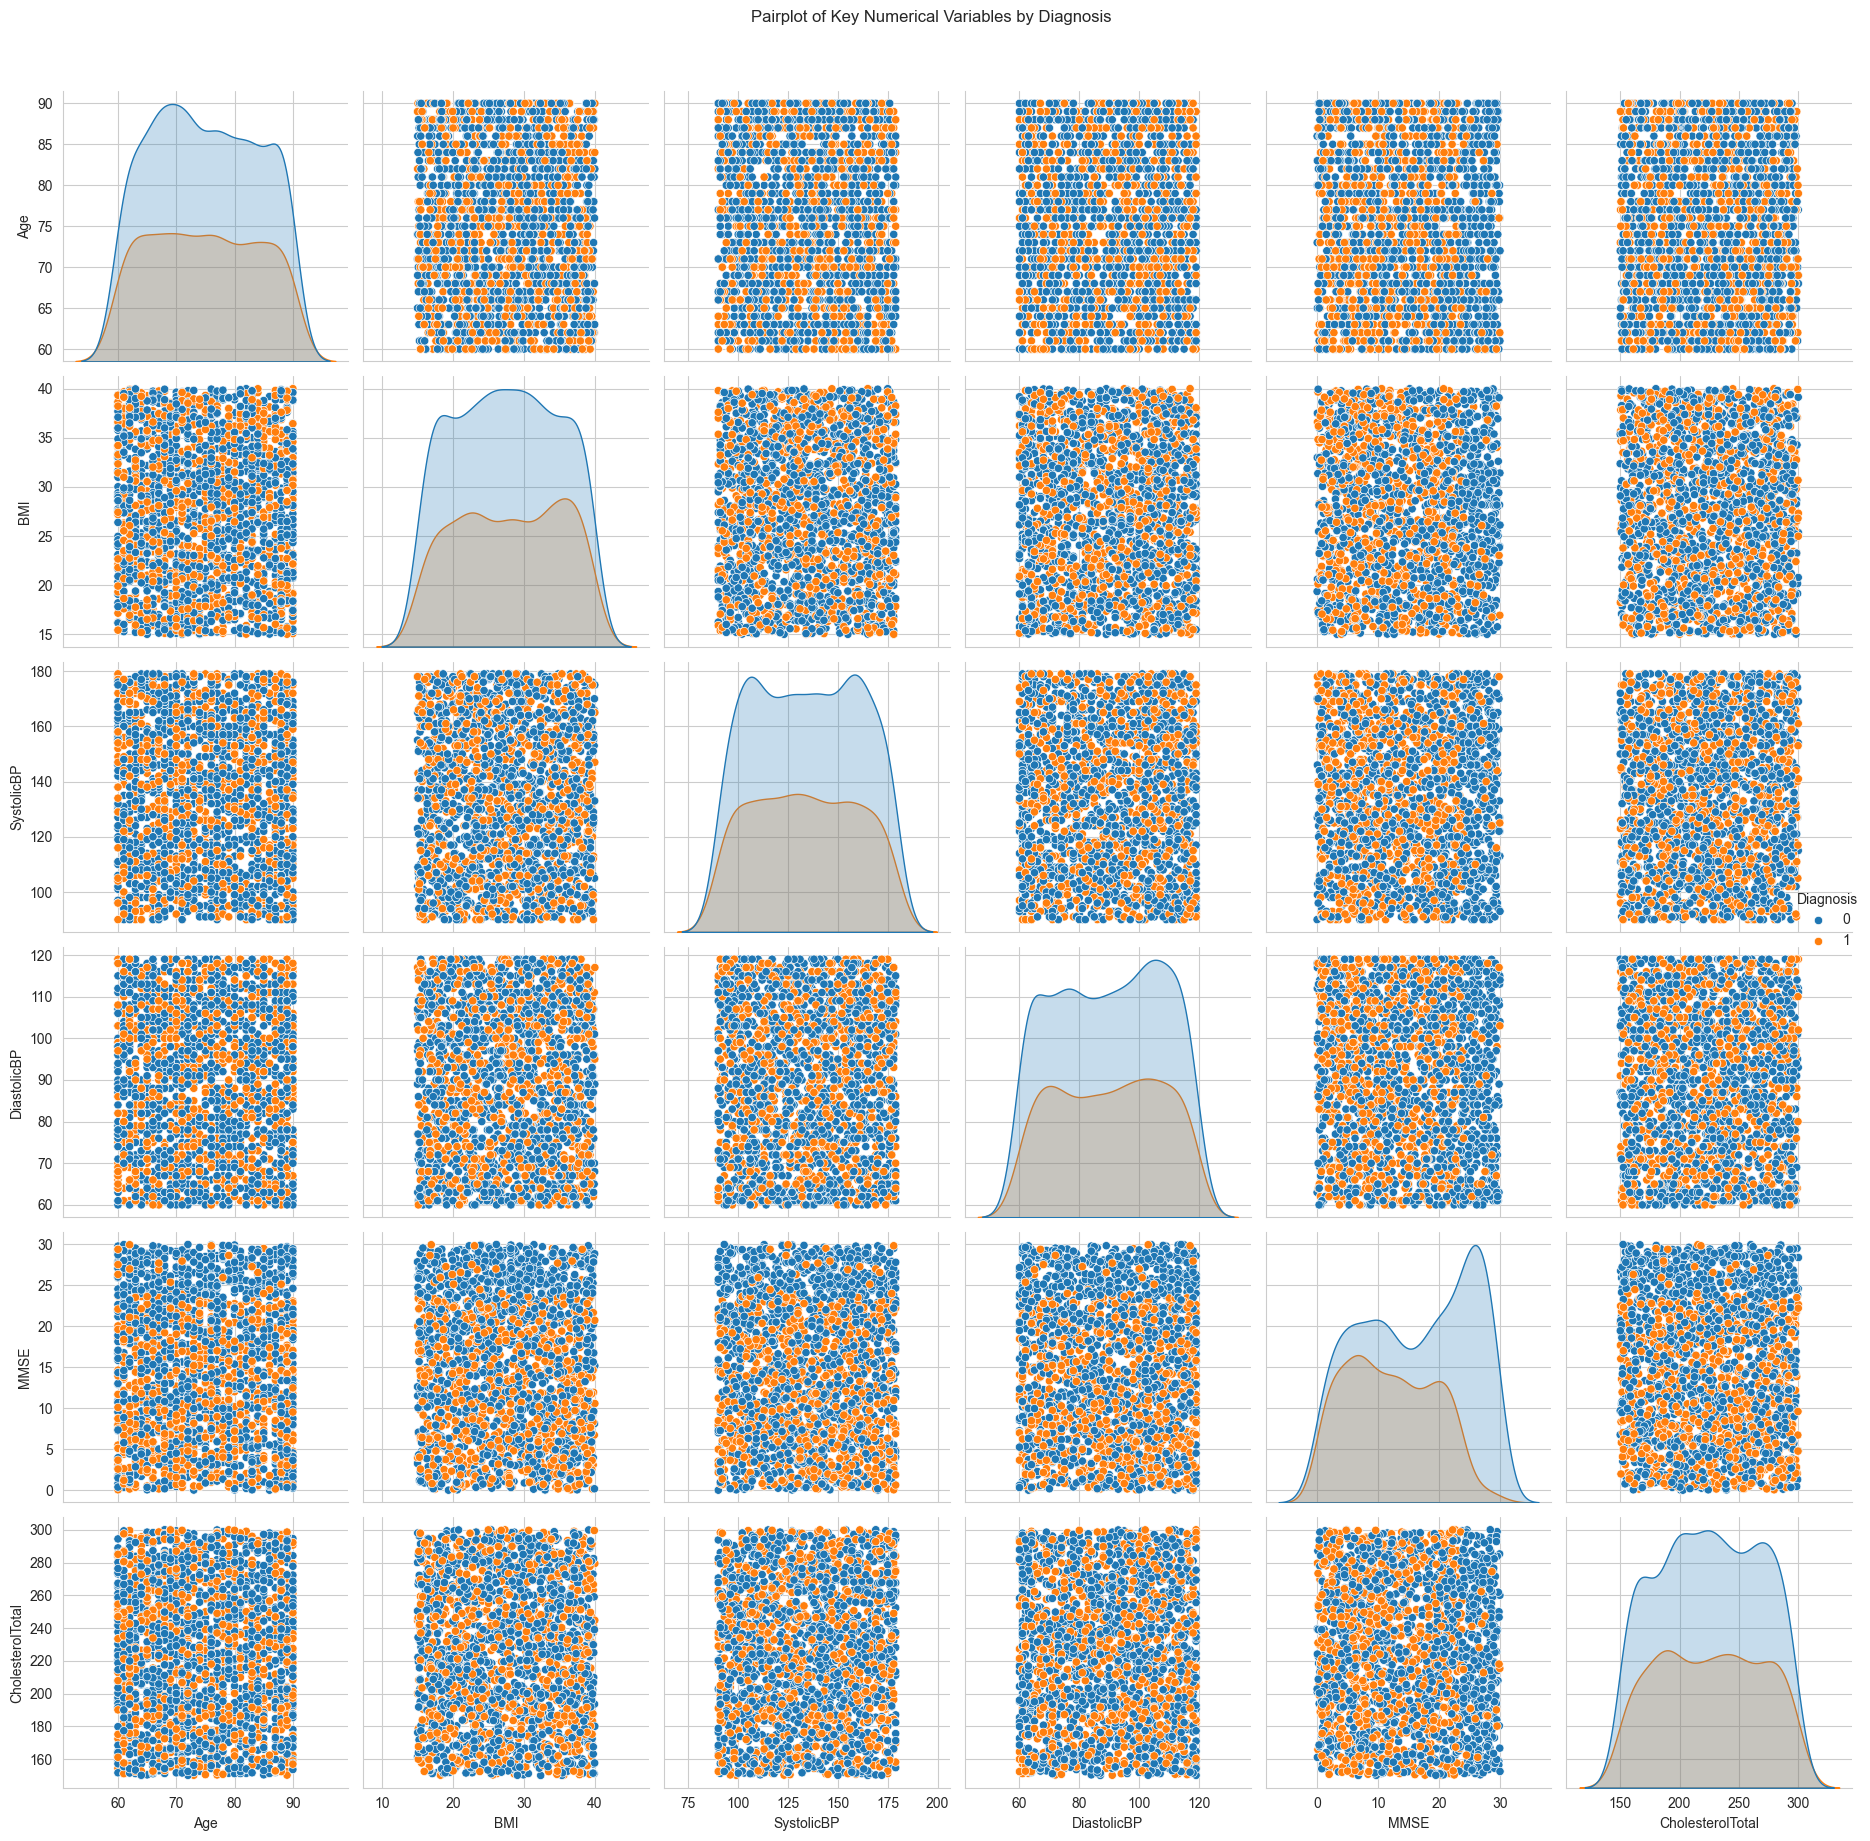

In [11]:
# Select key numerical variables for pairplot (to avoid too many plots)
key_num_variables = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'MMSE', 'CholesterolTotal', 'Diagnosis']
key_num_variables = [col for col in key_num_variables if col in data.columns]

sns.pairplot(data[key_num_variables], hue="Diagnosis", height=3, diag_kind="kde")
plt.suptitle("Pairplot of Key Numerical Variables by Diagnosis", y=1.02)
plt.tight_layout()
plt.show()


Every pair of variables forms an almost solid block of orange and blue points, so there’s no clear separation between diagnoses. The diagonal KDEs show that the two groups share very similar marginal distributions for Age, BMI, blood pressures, MMSE, etc. In short, this pairplot suggests the numeric features alone don’t discriminate well between diagnosis classes.

#### Correlation Matrix


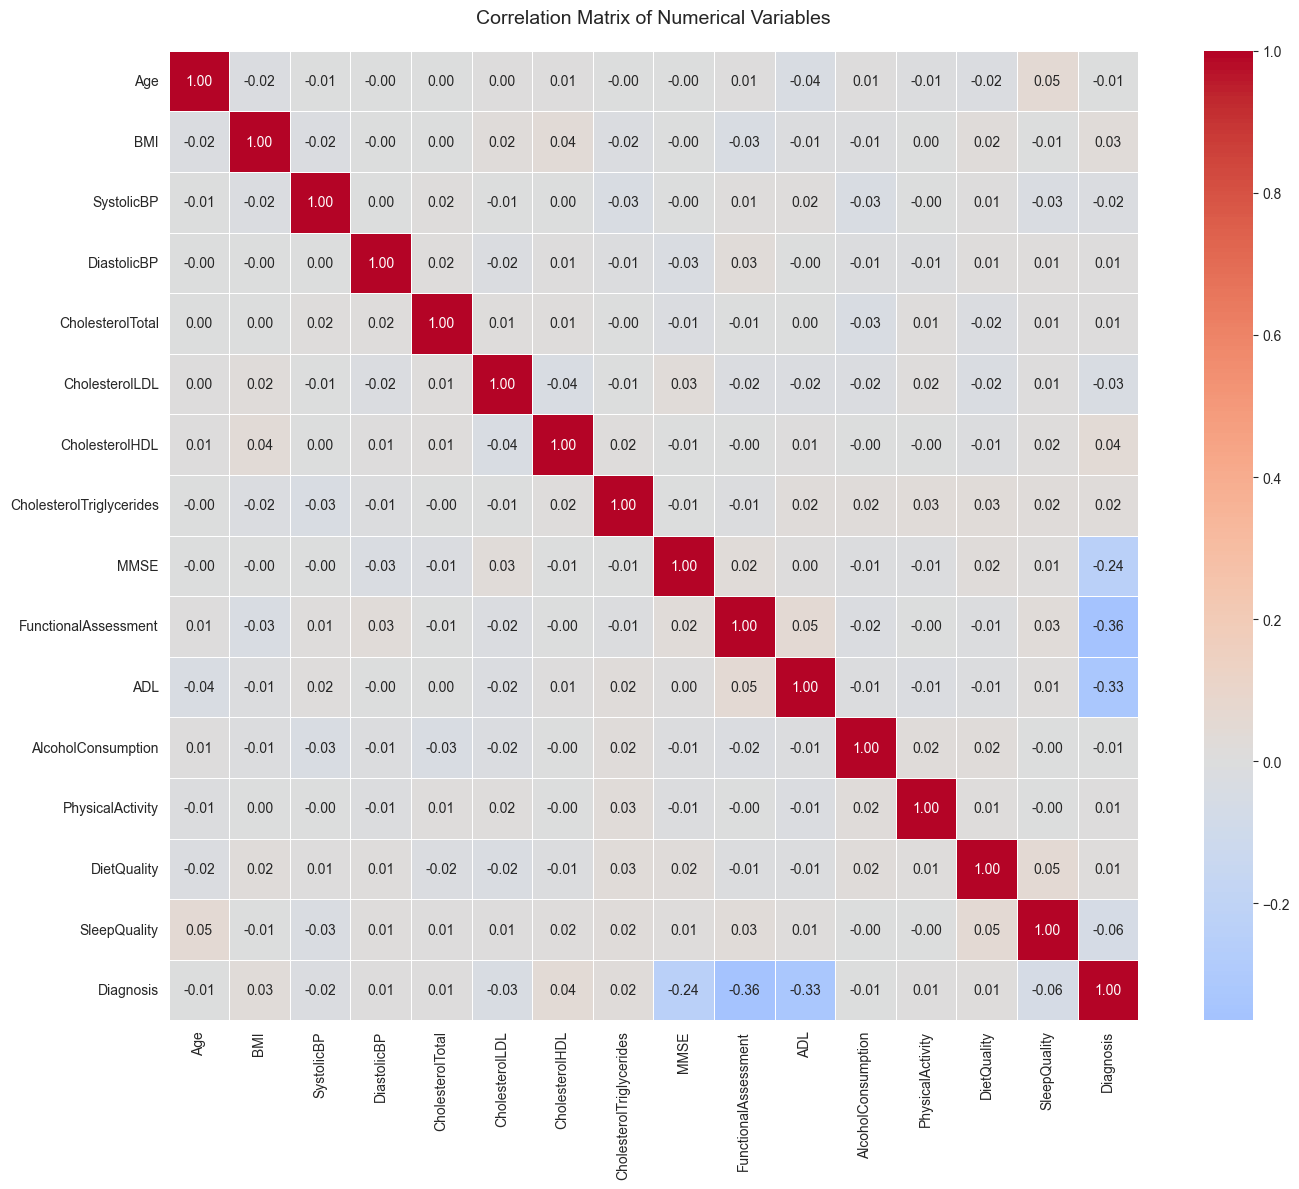


Correlation with Diagnosis (sorted by absolute value):
FunctionalAssessment       -0.364898
ADL                        -0.332346
MMSE                       -0.237126
SleepQuality               -0.056548
CholesterolHDL              0.042584
CholesterolLDL             -0.031976
BMI                         0.026343
CholesterolTriglycerides    0.022672
SystolicBP                 -0.015615
DietQuality                 0.008506
AlcoholConsumption         -0.007618
CholesterolTotal            0.006394
PhysicalActivity            0.005945
Age                        -0.005488
DiastolicBP                 0.005293
Name: Diagnosis, dtype: float64


In [10]:
# Select variables for correlation matrix (numerical variables + target)
corr_variables = num_variables + target_variable
corr_variables = [col for col in corr_variables if col in data.columns]

corr_matrix = data[corr_variables].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_corr = corr_matrix['Diagnosis'].drop('Diagnosis').sort_values(key=abs, ascending=False)
print("\nCorrelation with Diagnosis (sorted by absolute value):")
print(target_corr)


## 2. Advanced Data Analysis

This section applies comprehensive analysis techniques similar to those used in the cars dataset analysis, including outlier detection, feature importance analysis, and feature interaction studies.


### 2.1 Outlier Detection and Analysis

Let's analyze outliers in numerical variables similar to the cars dataset approach. We'll identify potential outliers using boxplots and IQR method.


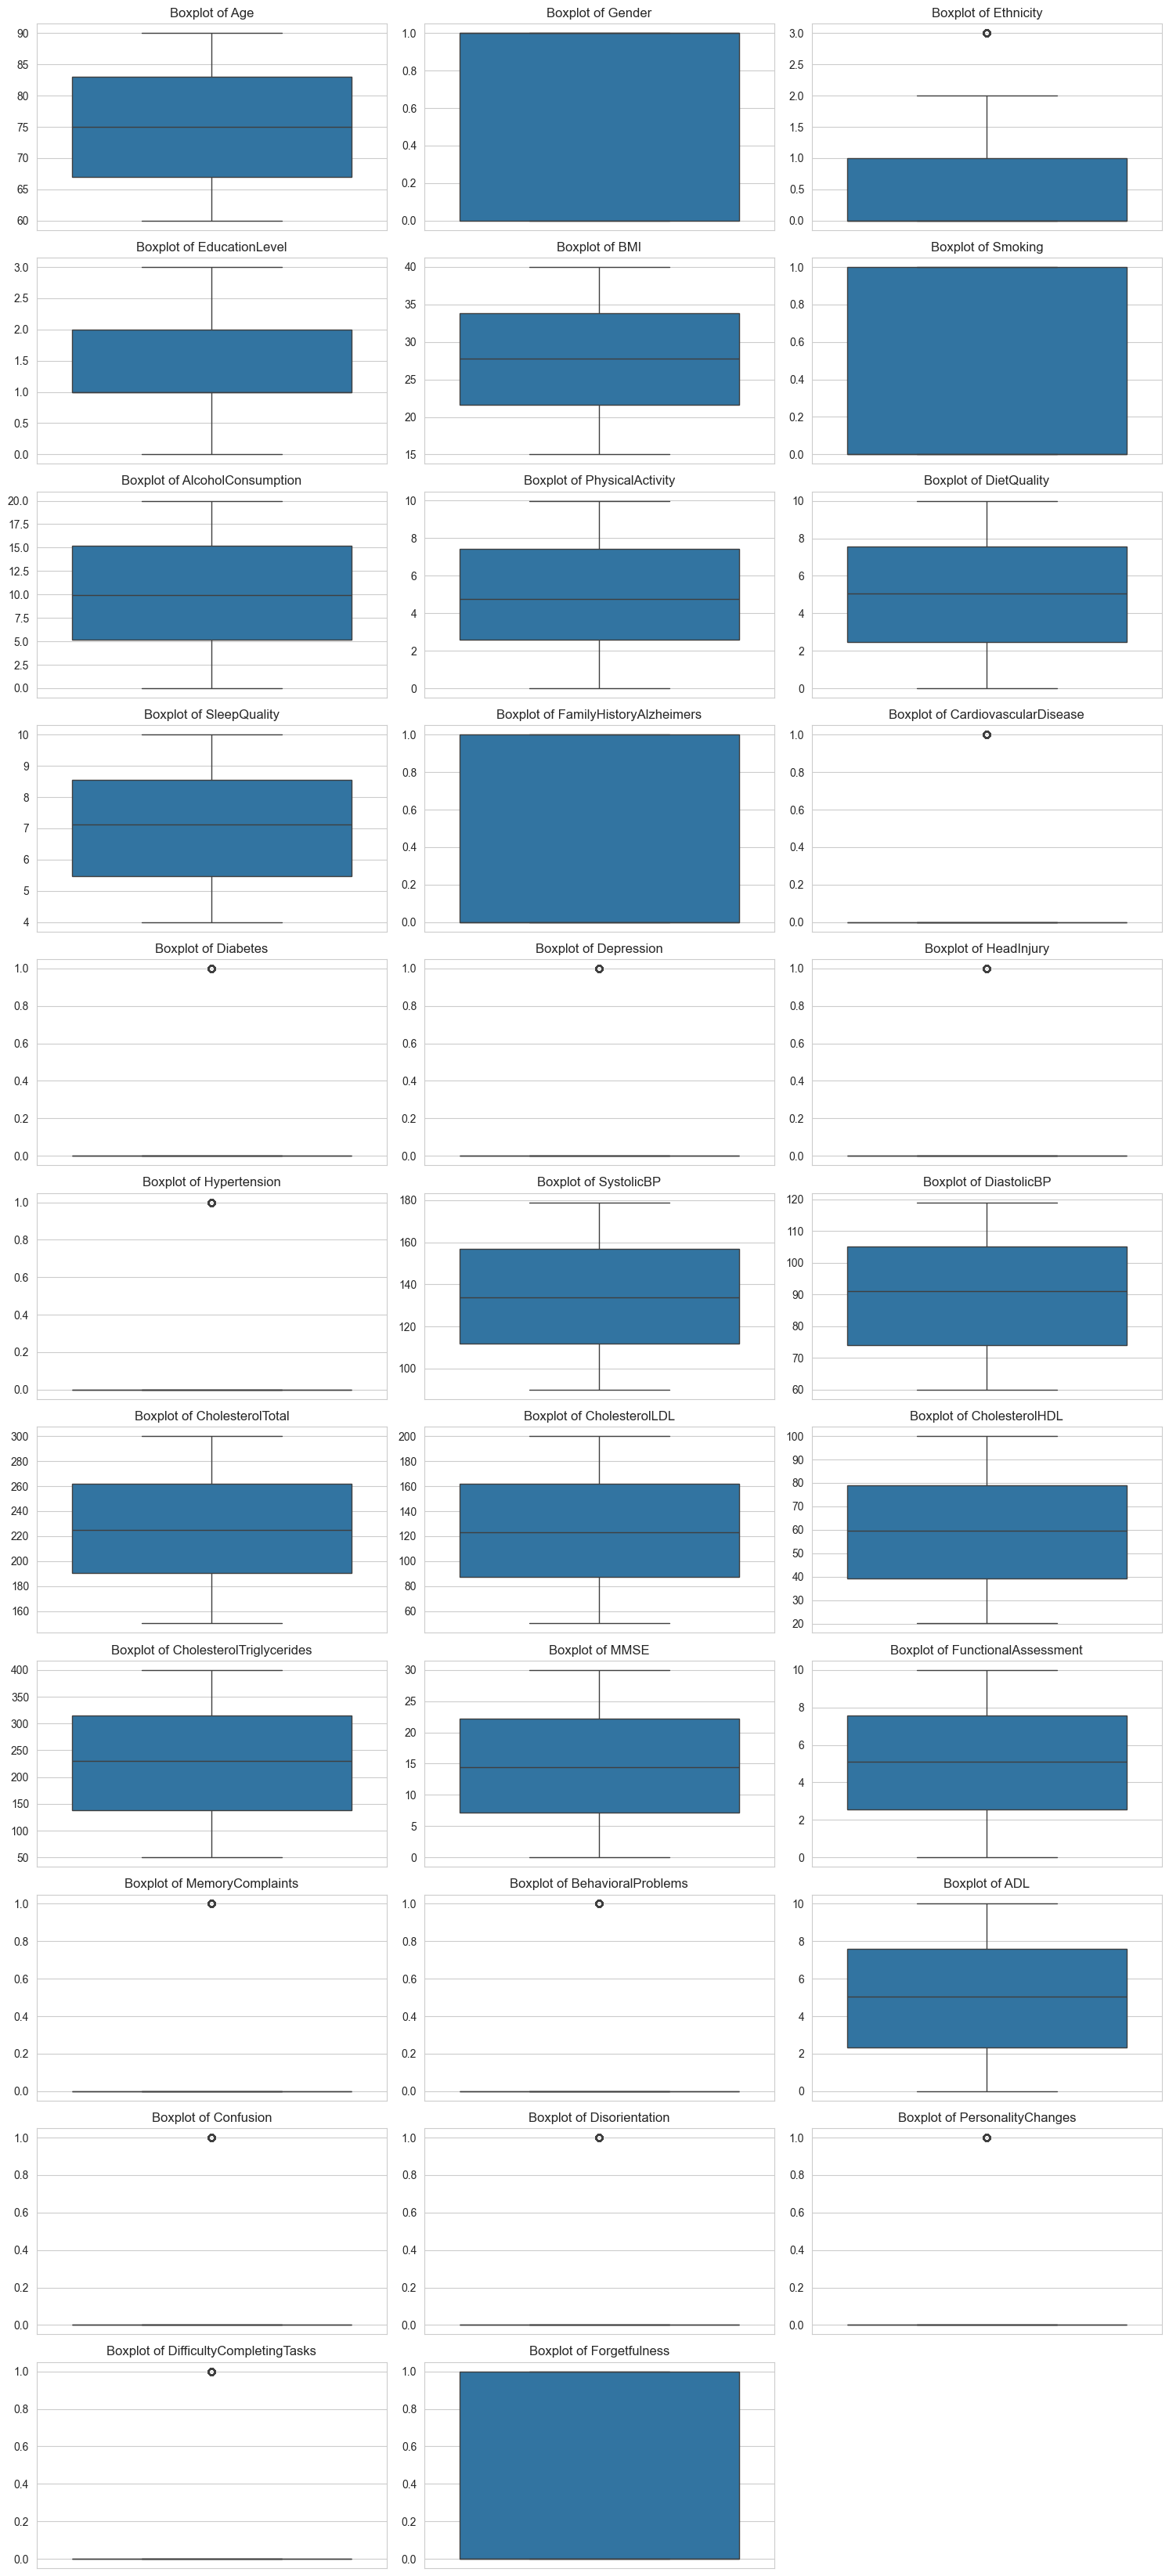


Outlier Analysis (IQR Method):
                  Feature  Lower Bound  Upper Bound  Outlier Count Outlier %
                      Age    43.000000   107.000000              0     0.00%
                   Gender    -1.500000     2.500000              0     0.00%
                Ethnicity    -1.500000     2.500000            211     9.82%
           EducationLevel    -0.500000     3.500000              0     0.00%
                      BMI     3.223853    52.257332              0     0.00%
                  Smoking    -1.500000     2.500000              0     0.00%
       AlcoholConsumption    -9.887372    30.185112              0     0.00%
         PhysicalActivity    -4.715282    14.713807              0     0.00%
              DietQuality    -5.191800    15.208879              0     0.00%
             SleepQuality     0.863712    13.181807              0     0.00%
  FamilyHistoryAlzheimers    -1.500000     2.500000              0     0.00%
    CardiovascularDisease     0.000000     0

In [13]:
# Boxplots for all numerical variables to identify outliers
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
# Exclude PatientID and Diagnosis from outlier analysis
numeric_columns = [col for col in numeric_columns if col not in ['PatientID', 'Diagnosis']]

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Calculate IQR-based outlier detection
print("\nOutlier Analysis (IQR Method):")
print("=" * 60)
outlier_summary = []

for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(data)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier %': f"{outlier_pct:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))


### 2.2 Feature Importance Analysis

Visualize feature importance based on correlation with the target variable, similar to the cars dataset analysis.


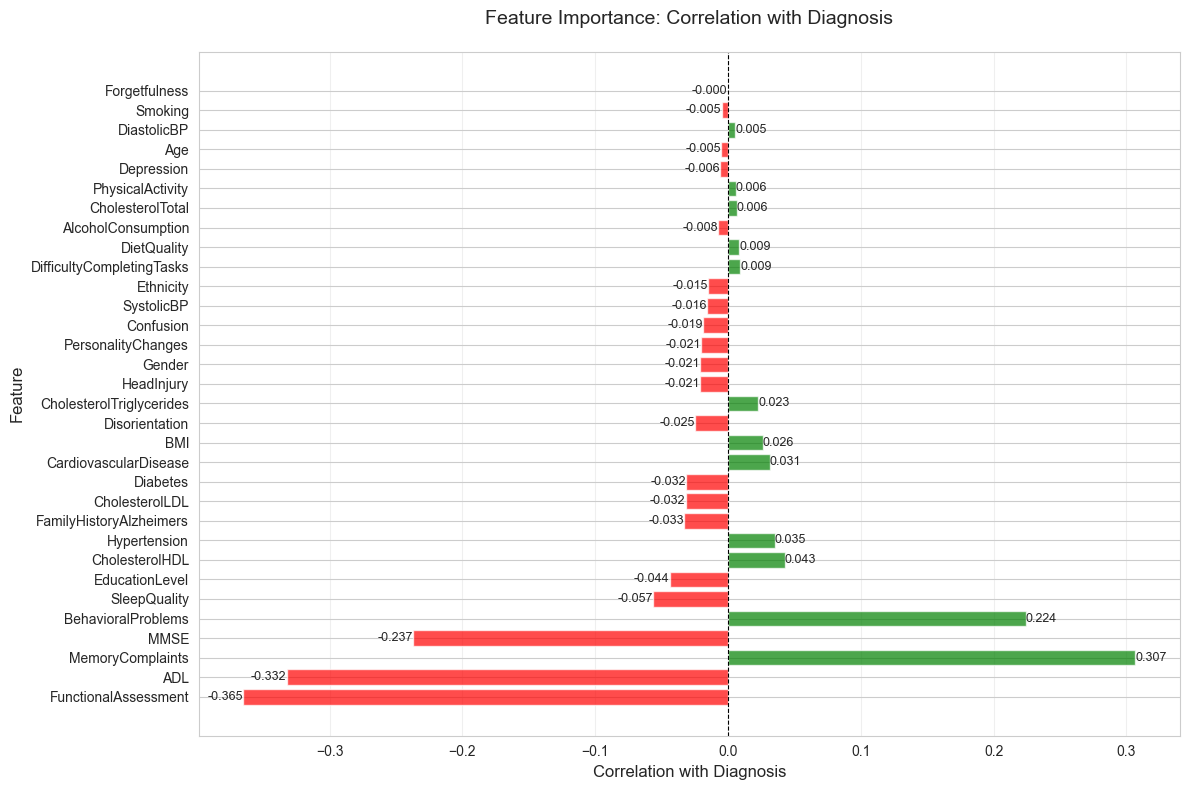


Top 10 Features by Absolute Correlation with Diagnosis:
                Feature  Correlation
   FunctionalAssessment    -0.364898
                    ADL    -0.332346
       MemoryComplaints     0.306742
                   MMSE    -0.237126
     BehavioralProblems     0.224350
           SleepQuality    -0.056548
         EducationLevel    -0.043966
         CholesterolHDL     0.042584
           Hypertension     0.035080
FamilyHistoryAlzheimers    -0.032900


In [14]:
# Calculate correlations with target variable
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['PatientID', 'Diagnosis']]

corr_with_target = {}
for col in numeric_cols:
    corr_val = data[col].corr(data['Diagnosis'])
    corr_with_target[col] = corr_val

# Sort by absolute correlation
corr_df = pd.DataFrame({
    'Feature': list(corr_with_target.keys()),
    'Correlation': list(corr_with_target.values())
})
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in corr_df['Correlation']]
bars = plt.barh(corr_df['Feature'], corr_df['Correlation'], color=colors, alpha=0.7)
plt.xlabel('Correlation with Diagnosis', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance: Correlation with Diagnosis', fontsize=14, pad=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (idx, row) in enumerate(corr_df.iterrows()):
    plt.text(row['Correlation'], i, f"{row['Correlation']:.3f}", 
             va='center', ha='left' if row['Correlation'] > 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTop 10 Features by Absolute Correlation with Diagnosis:")
print("=" * 60)
print(corr_df[['Feature', 'Correlation']].head(10).to_string(index=False))


### 2.3 All Features vs Target Analysis

Analyze the relationship between all features and the target variable using a comprehensive grid plot, similar to the cars dataset approach.


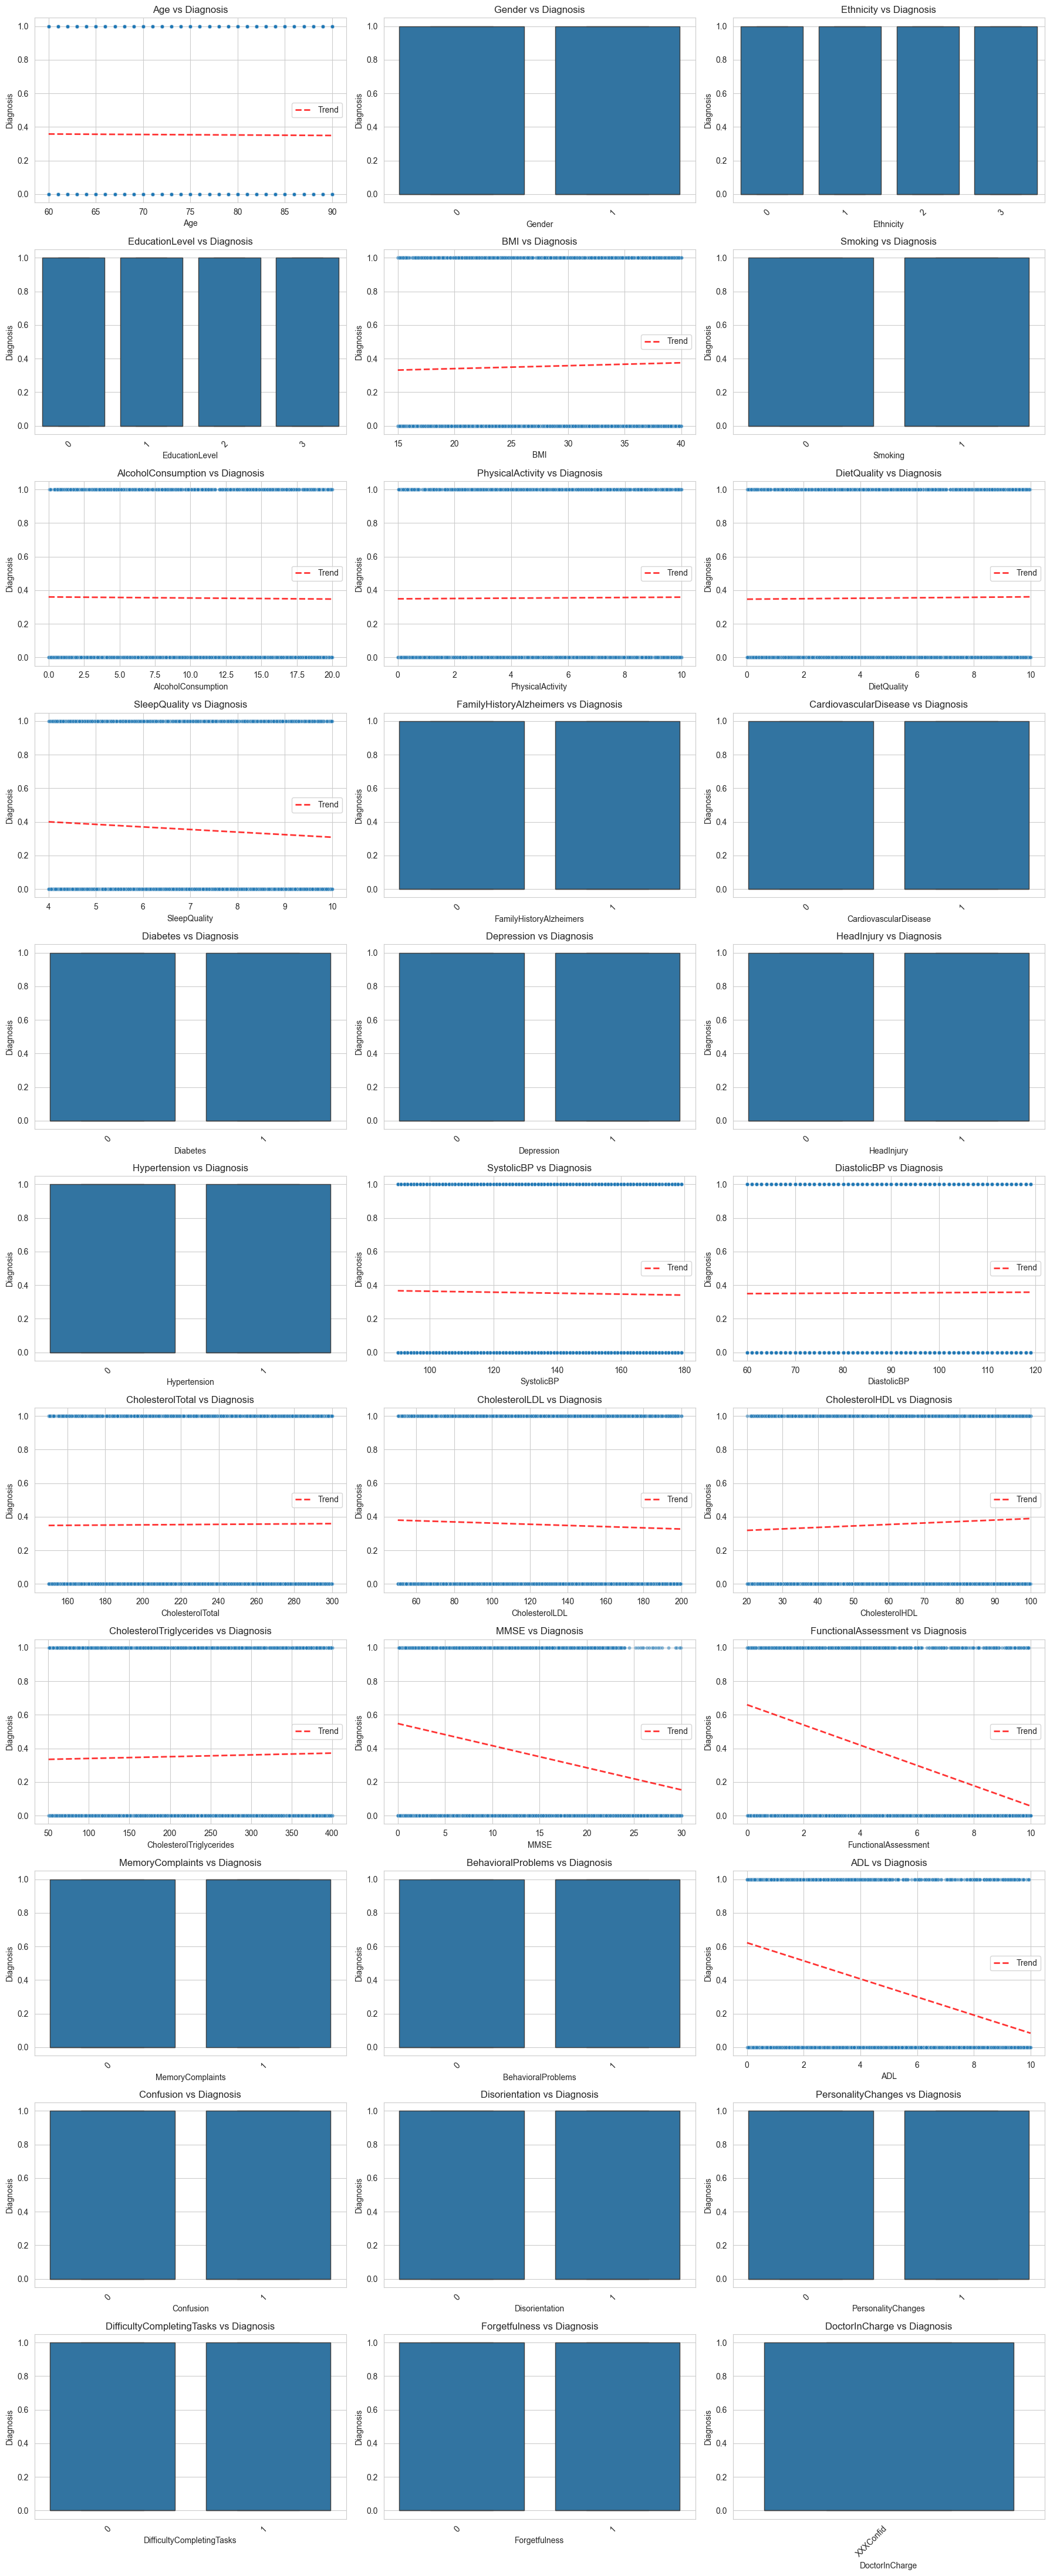

In [15]:
# Get all features (excluding PatientID and Diagnosis)
all_features = [col for col in data.columns if col not in ['PatientID', 'Diagnosis']]

# Determine plot type for each feature
n_cols = 3
n_rows = (len(all_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, feature in enumerate(all_features):
    ax = axes[i]
    
    if data[feature].dtype == 'object' or data[feature].nunique() < 10:
        # For categorical or discrete data, use boxplot
        sns.boxplot(x=feature, y='Diagnosis', data=data, ax=ax)
        ax.set_title(f'{feature} vs Diagnosis')
        ax.set_ylabel('Diagnosis')
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    else:
        # For continuous data, use scatter plot with regression line
        sns.scatterplot(x=feature, y='Diagnosis', data=data, ax=ax, alpha=0.5, s=20)
        # Add regression line
        z = np.polyfit(data[feature], data['Diagnosis'], 1)
        p = np.poly1d(z)
        ax.plot(data[feature].sort_values(), p(data[feature].sort_values()), 
                "r--", alpha=0.8, linewidth=2, label='Trend')
        ax.set_title(f'{feature} vs Diagnosis')
        ax.set_ylabel('Diagnosis')
        ax.legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 2.4 Distribution Analysis for All Features

Analyze the distribution of all features, categorizing them by data type (continuous, discrete, categorical) similar to the cars dataset approach.


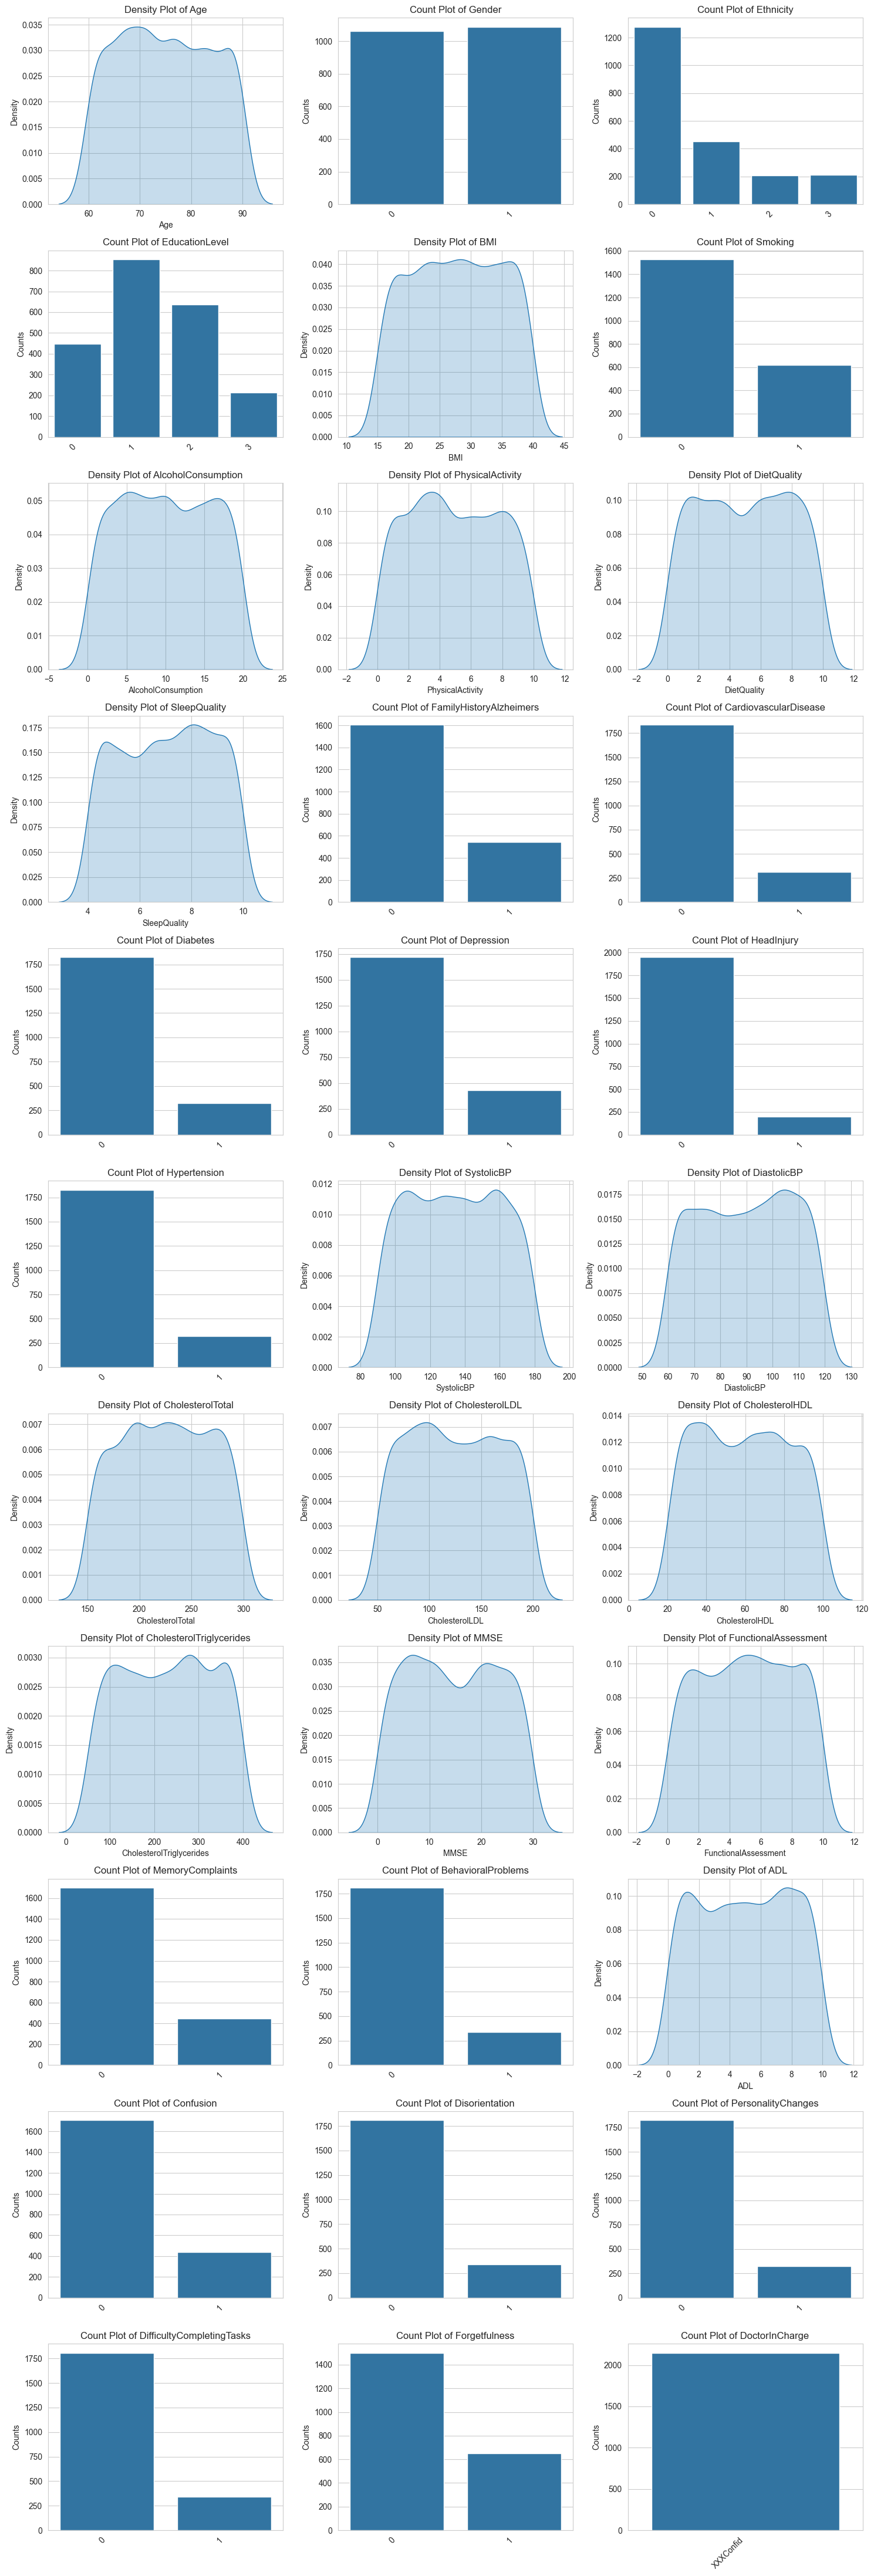

In [16]:
# Define the type of plot for each column based on the data type
plot_types = {}
columns = [col for col in data.columns if col not in ['PatientID', 'Diagnosis']]

for col in columns:
    if data[col].dtype == 'object':  # Categorical columns
        plot_types[col] = 'bar'
    else:
        unique_values = data[col].nunique()
        if unique_values < 10:  # Discrete columns
            plot_types[col] = 'bar'
        else:  # Continuous columns
            plot_types[col] = 'kde'

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# Plot each column in the dataframe
for i, col in enumerate(columns):
    ax = axes[i]
    if plot_types[col] == 'bar':
        # For categorical and discrete data, use a count plot (bar chart)
        sns.countplot(x=col, data=data, ax=ax)
        ax.set_title(f'Count Plot of {col}')
        ax.set_xlabel('')
        ax.set_ylabel('Counts')
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    else:
        # For continuous data, use a density plot
        sns.kdeplot(data[col], ax=ax, fill=True)
        ax.set_title(f'Density Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 2.5 Feature Interaction Analysis

Analyze how key features interact with each other and their combined effect on the diagnosis, similar to the dependence plots in the cars dataset.


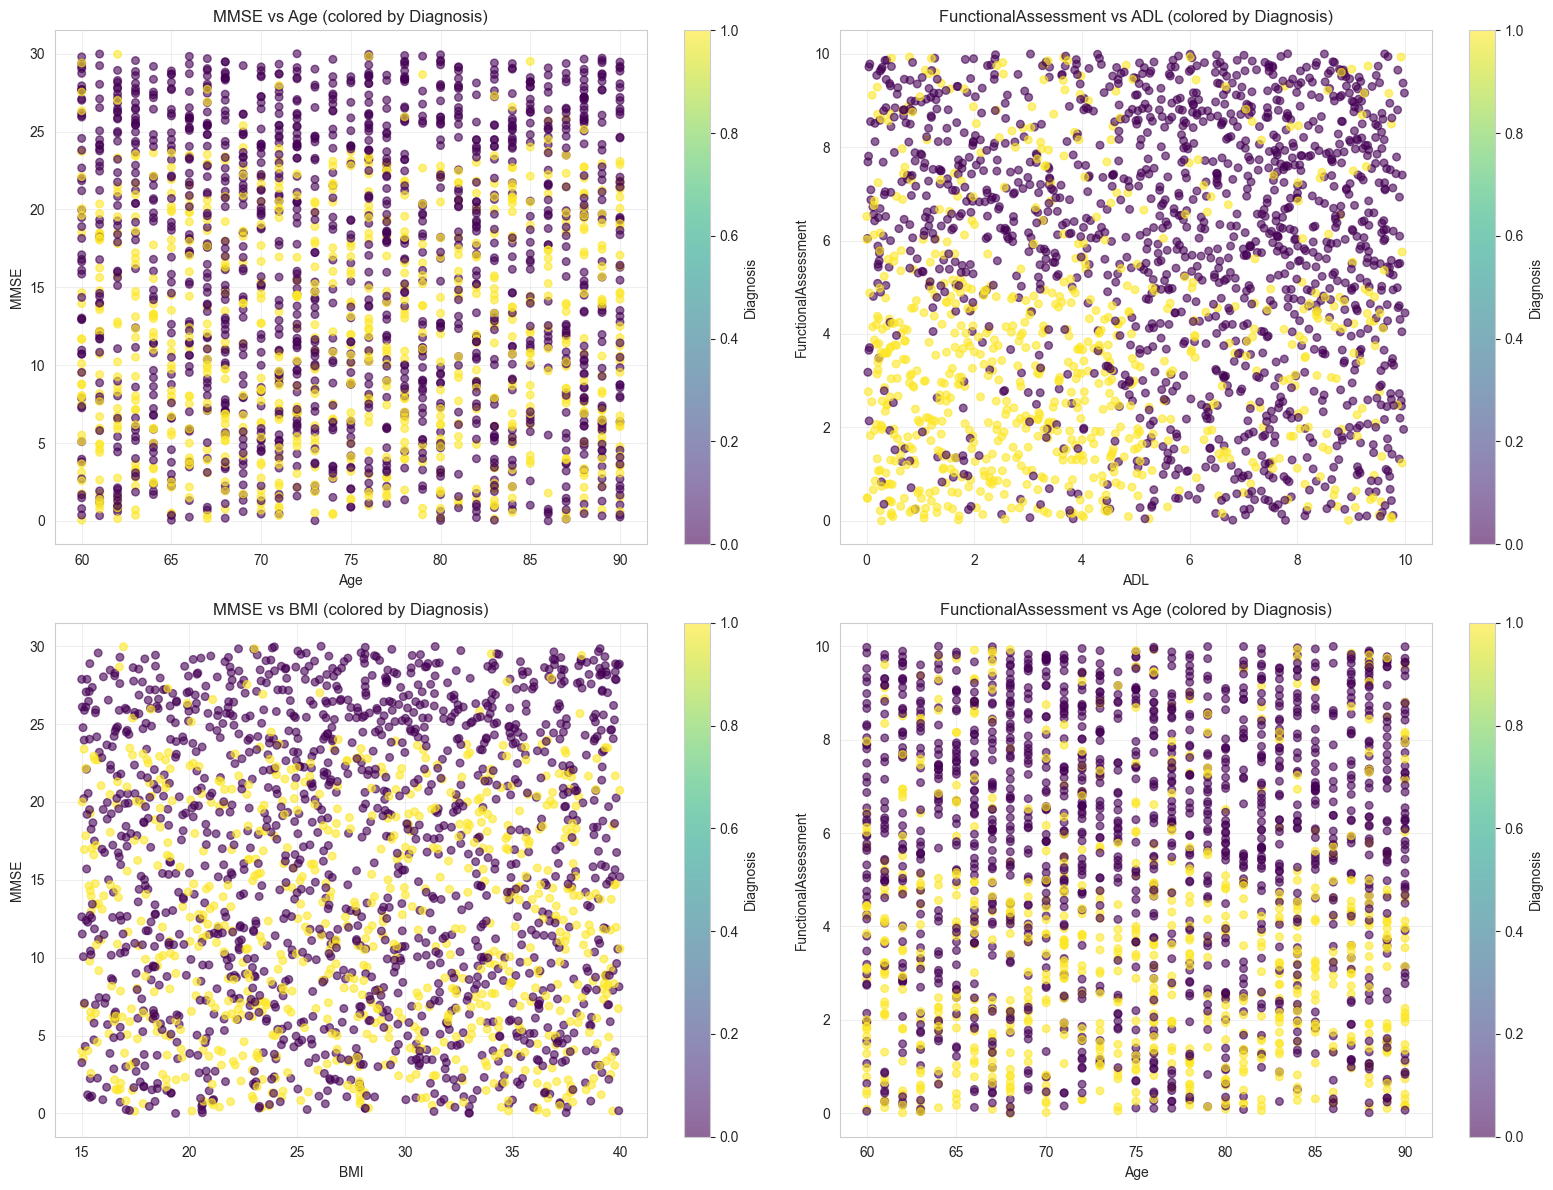

In [17]:
# Select key features for interaction analysis
key_features = ['MMSE', 'FunctionalAssessment', 'ADL', 'Age', 'BMI']

# Create interaction plots: how one feature affects the relationship between another feature and diagnosis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Interaction 1: MMSE vs Age, colored by Diagnosis
scatter1 = axes[0].scatter(data['Age'], data['MMSE'], 
                          c=data['Diagnosis'], cmap='viridis', alpha=0.6, s=30)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('MMSE')
axes[0].set_title('MMSE vs Age (colored by Diagnosis)')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Diagnosis')

# Interaction 2: FunctionalAssessment vs ADL, colored by Diagnosis
scatter2 = axes[1].scatter(data['ADL'], data['FunctionalAssessment'], 
                          c=data['Diagnosis'], cmap='viridis', alpha=0.6, s=30)
axes[1].set_xlabel('ADL')
axes[1].set_ylabel('FunctionalAssessment')
axes[1].set_title('FunctionalAssessment vs ADL (colored by Diagnosis)')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Diagnosis')

# Interaction 3: MMSE vs BMI, colored by Diagnosis
scatter3 = axes[2].scatter(data['BMI'], data['MMSE'], 
                          c=data['Diagnosis'], cmap='viridis', alpha=0.6, s=30)
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('MMSE')
axes[2].set_title('MMSE vs BMI (colored by Diagnosis)')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[2], label='Diagnosis')

# Interaction 4: Age vs FunctionalAssessment, colored by Diagnosis
scatter4 = axes[3].scatter(data['Age'], data['FunctionalAssessment'], 
                          c=data['Diagnosis'], cmap='viridis', alpha=0.6, s=30)
axes[3].set_xlabel('Age')
axes[3].set_ylabel('FunctionalAssessment')
axes[3].set_title('FunctionalAssessment vs Age (colored by Diagnosis)')
axes[3].grid(True, alpha=0.3)
plt.colorbar(scatter4, ax=axes[3], label='Diagnosis')

plt.tight_layout()
plt.show()


### 2.6 Statistical Significance Tests

Perform statistical tests to validate the relationships between features and diagnosis, similar to the analytical approach in the cars dataset.


In [18]:
from scipy import stats

# Statistical tests for numerical features
print("Statistical Significance Tests for Numerical Features")
print("=" * 80)

# Get numeric features (excluding PatientID and Diagnosis)
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['PatientID', 'Diagnosis']]

statistical_results = []

for feature in numeric_features:
    # Split data by diagnosis
    group_0 = data[data['Diagnosis'] == 0][feature]
    group_1 = data[data['Diagnosis'] == 1][feature]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    
    # Calculate means
    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    
    statistical_results.append({
        'Feature': feature,
        'Mean (No Alzheimer)': f"{mean_0:.3f}",
        'Mean (Alzheimer)': f"{mean_1:.3f}",
        'Difference': f"{mean_1 - mean_0:.3f}",
        'T-statistic': f"{t_stat:.3f}",
        'P-value': f"{p_value:.6f}",
        'Significant (p<0.05)': 'Yes' if p_value < 0.05 else 'No'
    })

stats_df = pd.DataFrame(statistical_results)
print(stats_df.to_string(index=False))

# Visualize p-values
significant_features = stats_df[stats_df['P-value'].astype(float) < 0.05]
print(f"\n\nNumber of statistically significant features (p < 0.05): {len(significant_features)}")
print("\nSignificant Features:")
print(significant_features[['Feature', 'P-value', 'Difference']].to_string(index=False))


Statistical Significance Tests for Numerical Features
                  Feature Mean (No Alzheimer) Mean (Alzheimer) Difference T-statistic  P-value Significant (p<0.05)
                      Age              74.945           74.842     -0.103       0.254 0.799279                   No
                   Gender               0.514            0.492     -0.022       0.972 0.331114                   No
                Ethnicity               0.708            0.678     -0.031       0.685 0.493403                   No
           EducationLevel               1.316            1.233     -0.083       2.039 0.041556                  Yes
                      BMI              27.515           27.913      0.398      -1.221 0.222206                   No
                  Smoking               0.290            0.286     -0.005       0.225 0.821661                   No
       AlcoholConsumption              10.072            9.980     -0.092       0.353 0.724127                   No
         PhysicalA

### 2.7 Categorical Feature Analysis with Chi-Square Tests

Analyze categorical features and their association with diagnosis using chi-square tests.


In [21]:
from scipy.stats import chi2_contingency

# Chi-square tests for categorical features
print("Chi-Square Tests for Categorical Features")
print("=" * 80)

# Define categorical variables (binary and multi-category)
binary_variables = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 
                    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
                    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
                    'DifficultyCompletingTasks', 'Forgetfulness']
multi_cat_variables = ['Ethnicity', 'EducationLevel']
categorical_variables = binary_variables + multi_cat_variables

categorical_features = [col for col in categorical_variables if col in data.columns]
chi2_results = []

for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(data[feature], data['Diagnosis'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append({
        'Feature': feature,
        'Chi-square': f"{chi2:.3f}",
        'P-value': f"{p_value:.6f}",
        'Degrees of Freedom': dof,
        'Significant (p<0.05)': 'Yes' if p_value < 0.05 else 'No'
    })

chi2_df = pd.DataFrame(chi2_results)
print(chi2_df.to_string(index=False))

# Visualize significant categorical features
significant_cat = chi2_df[chi2_df['P-value'].astype(float) < 0.05]
print(f"\n\nNumber of statistically significant categorical features (p < 0.05): {len(significant_cat)}")
print("\nSignificant Categorical Features:")
print(significant_cat[['Feature', 'P-value', 'Chi-square']].to_string(index=False))


Chi-Square Tests for Categorical Features
                  Feature Chi-square  P-value  Degrees of Freedom Significant (p<0.05)
                   Gender      0.860 0.353818                   1                   No
                  Smoking      0.031 0.860493                   1                   No
  FamilyHistoryAlzheimers      2.170 0.140698                   1                   No
    CardiovascularDisease      1.948 0.162837                   1                   No
                 Diabetes      1.953 0.162245                   1                   No
               Depression      0.047 0.828334                   1                   No
               HeadInjury      0.837 0.360323                   1                   No
             Hypertension      2.442 0.118089                   1                   No
         MemoryComplaints    200.624 0.000000                   1                  Yes
       BehavioralProblems    106.879 0.000000                   1                  Yes
 

### 2.8 Risk Factor Analysis

Analyze the prevalence of risk factors in patients with and without Alzheimer's, similar to analyzing feature importance in the cars dataset.


Risk Factor Analysis
              Risk Factor Prevalence (No Alzheimer) Prevalence (Alzheimer) Risk Ratio Difference
         MemoryComplaints                    11.59%                 37.63%       3.25     26.04%
       BehavioralProblems                     9.65%                 26.71%       2.77     17.06%
             Hypertension                    13.97%                 16.58%       1.19      2.61%
    CardiovascularDisease                    13.61%                 15.92%       1.17      2.31%
DifficultyCompletingTasks                    15.62%                 16.32%       1.04      0.69%
            Forgetfulness                    30.17%                 30.13%       1.00     -0.03%
                  Smoking                    29.01%                 28.55%       0.98     -0.46%
               Depression                    20.23%                 19.74%       0.98     -0.49%
                Confusion                    21.09%                 19.47%       0.92     -1.62%
       Pe

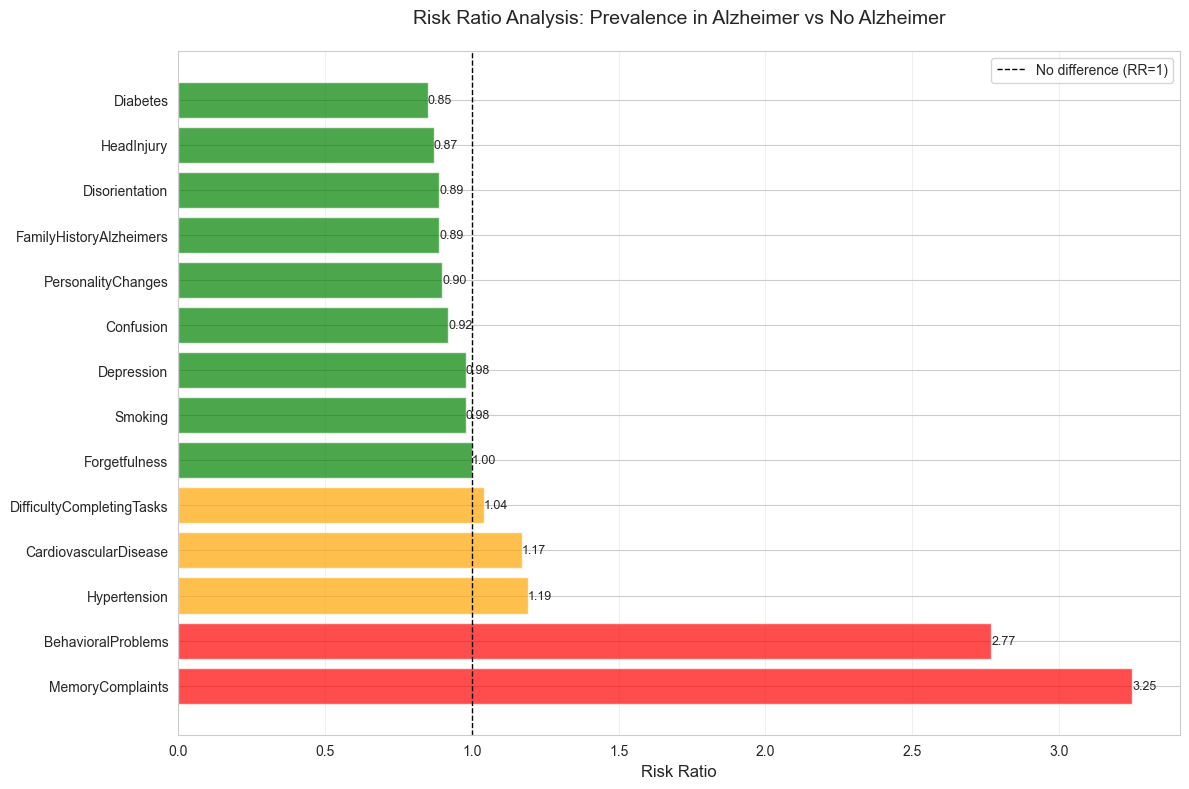

In [22]:
# Calculate risk ratios for binary features
binary_risk_factors = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 
                       'Depression', 'HeadInjury', 'Hypertension', 'Smoking',
                       'MemoryComplaints', 'BehavioralProblems', 'Confusion', 
                       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 
                       'Forgetfulness']

risk_analysis = []

for factor in binary_risk_factors:
    if factor in data.columns:
        # Calculate prevalence in each group
        no_alz_with = data[(data['Diagnosis'] == 0) & (data[factor] == 1)].shape[0]
        no_alz_total = data[data['Diagnosis'] == 0].shape[0]
        alz_with = data[(data['Diagnosis'] == 1) & (data[factor] == 1)].shape[0]
        alz_total = data[data['Diagnosis'] == 1].shape[0]
        
        prev_no_alz = (no_alz_with / no_alz_total) * 100 if no_alz_total > 0 else 0
        prev_alz = (alz_with / alz_total) * 100 if alz_total > 0 else 0
        
        # Calculate risk ratio
        risk_ratio = prev_alz / prev_no_alz if prev_no_alz > 0 else np.inf
        
        risk_analysis.append({
            'Risk Factor': factor,
            'Prevalence (No Alzheimer)': f"{prev_no_alz:.2f}%",
            'Prevalence (Alzheimer)': f"{prev_alz:.2f}%",
            'Risk Ratio': f"{risk_ratio:.2f}" if risk_ratio != np.inf else "N/A",
            'Difference': f"{prev_alz - prev_no_alz:.2f}%"
        })

risk_df = pd.DataFrame(risk_analysis)
risk_df = risk_df.sort_values('Risk Ratio', key=lambda x: pd.to_numeric(x.replace('N/A', '0'), errors='coerce'), ascending=False)

print("Risk Factor Analysis")
print("=" * 80)
print(risk_df.to_string(index=False))

# Visualize risk factors
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(risk_df))
risk_ratios = pd.to_numeric(risk_df['Risk Ratio'].replace('N/A', '0'), errors='coerce')
colors = ['red' if x > 1.5 else 'orange' if x > 1.0 else 'green' for x in risk_ratios]

bars = ax.barh(y_pos, risk_ratios, color=colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(risk_df['Risk Factor'])
ax.set_xlabel('Risk Ratio', fontsize=12)
ax.set_title('Risk Ratio Analysis: Prevalence in Alzheimer vs No Alzheimer', fontsize=14, pad=20)
ax.axvline(x=1.0, color='black', linestyle='--', linewidth=1, label='No difference (RR=1)')
ax.legend()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(risk_df.iterrows()):
    if row['Risk Ratio'] != 'N/A':
        ax.text(risk_ratios.iloc[i], i, f"{row['Risk Ratio']}", 
                va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()
